In [ ]:
# 2017 S2 FIT5211 Assignment 2
# Duo Pan
# 27554074

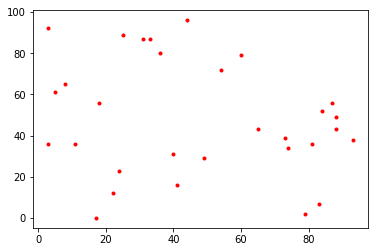

In [75]:
# Q1(1). ADT class for points and points set

from math import *
import random
import matplotlib.pyplot as plt

class Point:
    # constructor
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # distance to (0,0)
    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)
    
    # normal distance between self and other point
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)
    
    # reset x,y after translate
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
    
    # make it can be printed as a string
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    # make the class can be compare, and it makes sort easily.
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x or (self.x == other.x and self.y > other.y)
    
    def __lt__(self, other):
        return self.x < other.x or (self.x == other.x and self.y < other.y)
    
    # Manhattan distance
    def manhattan(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)
    

class PointSet:
    # constructor
    def __init__(self, init=None):
        if init is None:
            self.contents = []
        else:
            self.contents = init  
    
    # get length
    def __len__(self):
        return len(self.contents)
    
    # print all points in this set
    def display(self):
        for item in self.contents:
            print(item)
    
    # is empty
    def is_empty(self):
        return self.contents == []
    
    # binary search, get the right index, called by insert() and remove()
    # return index and 0/1, 0 means not find, 1 means find
    def findPosition(self, elem):
        low = 0  
        high = len(self) - 1  
        while low <= high:  
            mid = (high + low) // 2  
            if self.contents[mid] == elem:  
                return mid, 1  
            elif self.contents[mid] > elem:  
                high = mid - 1  
            else:  
                low = mid + 1  
        return low, 0
    
    # insert Point by x ascending order first, then y ascending
    def insert(self, elem):
        index, isfind = self.findPosition(elem)  
        if isfind == 1:
            # do not accept 2 points with the same x,y
            return False
        else:
            self.contents.insert(index, elem) 
            return True
    
    # remove elem from the set
    def remove(self, elem):
        index, isfind = self.findPosition(elem) 
        if isfind == 1:
            self.contents.pop(index)
        else:
            print(elem,end=' ')
            print("is not in the set")
        
    # clear the point set
    def removeAll(self):
        self.contents = []
            
    # get x list, used for plot
    def getXS(self):
        xs = []
        for item in self.contents:
            xs.append(item.x)
        return xs
     
    # get y list, used for plot
    def getYS(self):
        ys = []
        for item in self.contents:
            ys.append(item.y)
        return ys      

    
# Q1(2). Create a function to generate a test set of n random points

# randomly generate some points and store in the set
def createRandomPoints(number):
    ps = PointSet()
    for i in range(0,number):
        point = Point(random.randint(0,R),random.randint(0,R))
        if ps.insert(point) == False:
            i -= 1
    return ps

# range of the location
R = 100  
# number of points
n = 30

pointSet = createRandomPoints(n)
#show all the points
#pointSet.display()
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
plt.show()

In [76]:
# Q2. Implement an ADT class for Partition

# without path compression
class Partition:
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
    
    def make_partition(self):
        pass
        
    def make_set(self,x):
        self.parent[x] = x
        self.rank[x] = 0
        
    # without path compression
    def find(self,x):
        while(self.parent[x] != x):
            x = self.parent[x]
        return x
    
    def union(self,x, y):
        A = self.find(x)
        B = self.find(y)
        if self.rank[A] < self.rank[B]:
            self.parent[B] = A
        else:
            self.parent[A] = B
            if self.rank[A] == self.rank[B]:
                self.rank[B] = self.rank[B] + 1
       
    

{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'edges': {(28.4605, 21, 24), (21.2603, 16, 19), (6.0, 27, 28), (8.0, 0, 4), (13.0, 5, 7), (5.0, 25, 28), (18.3848, 4, 8), (9.2195, 13, 16), (15.0333, 13, 14), (5.0, 2, 3), (6.4031, 22, 24), (6.3246, 9, 10), (9.8995, 23, 27), (22.2036, 1, 9), (8.9443, 19, 20), (27.4591, 1, 3), (5.0, 25, 26), (9.2195, 17, 18), (7.0711, 27, 29), (13.4536, 3, 6), (7.6158, 11, 12), (7.2801, 21, 23), (11.1803, 7, 8), (2.0, 10, 11), (17.8885, 8, 13), (5.099, 20, 21), (19.6977, 12, 17), (14.2127, 11, 15), (21.1896, 4, 6)}}
total weights:  351.5005


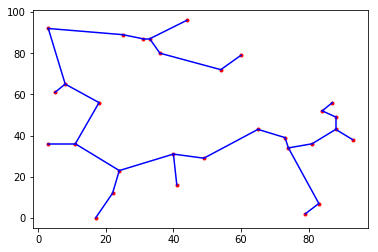

In [77]:
# Q3. Implement the clustering procedure

import matplotlib.pyplot as plt

partition = Partition()

def kruskal(graph):
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition.find(u) != partition.find(v):
            partition.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
    
    return F, total

# point index represents the vertice in a tree
graph = {
'vertices': [i for i in range (0,len(pointSet.contents))],
'edges': set([])
}

# build the tree
for i in range (0,len(pointSet.contents)):
    for j in range (i+1,len(pointSet.contents)):
        e = round(pointSet.contents[i].distance(pointSet.contents[j]),4)
        graph['edges'].add((e,i,j))

tree, total = kruskal(graph)
print(tree)
print('total weights: ', total)


plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
for e in tree['edges']: 
    plt.plot([pointSet.contents[e[1]].x,pointSet.contents[e[2]].x],[pointSet.contents[e[1]].y,pointSet.contents[e[2]].y],'b')
plt.show()



{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'edges': {(28.4605, 21, 24), (21.2603, 16, 19), (6.0, 27, 28), (8.0, 0, 4), (13.0, 5, 7), (5.0, 25, 28), (18.3848, 4, 8), (9.2195, 13, 16), (15.0333, 13, 14), (5.0, 2, 3), (6.4031, 22, 24), (6.3246, 9, 10), (9.8995, 23, 27), (22.2036, 1, 9), (8.9443, 19, 20), (27.4591, 1, 3), (5.0, 25, 26), (9.2195, 17, 18), (7.0711, 27, 29), (13.4536, 3, 6), (7.6158, 11, 12), (7.2801, 21, 23), (11.1803, 7, 8), (2.0, 10, 11), (17.8885, 8, 13), (5.099, 20, 21), (19.6977, 12, 17), (14.2127, 11, 15), (21.1896, 4, 6)}}
total weights:  351.5005


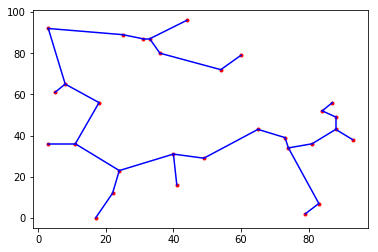

In [78]:
# Q4. Partition ADT class with path compression, and test with the same data

import matplotlib.pyplot as plt

# with path compression
class Partition2:
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
    
    def make_partition(self):
        pass
        
    def make_set(self,x):
        self.parent[x] = x
        self.rank[x] = 0
        
    # with path compression
    def find(self,x):
        if x != self.parent[x]:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self,x, y):
        A = self.find(x)
        B = self.find(y)
        if self.rank[A] < self.rank[B]:
            self.parent[B] = A
        else:
            self.parent[A] = B
            if self.rank[A] == self.rank[B]:
                self.rank[B] = self.rank[B] + 1
                    
partition2 = Partition2()

def kruskal2(graph):
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition2.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition2.find(u) != partition2.find(v):
            partition2.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
    
    return F, total


tree2, total2 = kruskal2(graph)
print(tree2)
print('total weights: ', total2)


plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
for e in tree2['edges']: 
    plt.plot([pointSet.contents[e[1]].x,pointSet.contents[e[2]].x],[pointSet.contents[e[1]].y,pointSet.contents[e[2]].y],'b')
plt.show()

Forest is  {'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'edges': {(6.0, 27, 28), (8.0, 0, 4), (13.0, 5, 7), (5.0, 25, 28), (18.3848, 4, 8), (9.2195, 13, 16), (15.0333, 13, 14), (5.0, 2, 3), (6.4031, 22, 24), (6.3246, 9, 10), (9.8995, 23, 27), (8.9443, 19, 20), (5.0, 25, 26), (9.2195, 17, 18), (7.0711, 27, 29), (13.4536, 3, 6), (7.6158, 11, 12), (7.2801, 21, 23), (11.1803, 7, 8), (2.0, 10, 11), (17.8885, 8, 13), (5.099, 20, 21), (19.6977, 12, 17), (14.2127, 11, 15)}}
total weights:  230.92739999999998


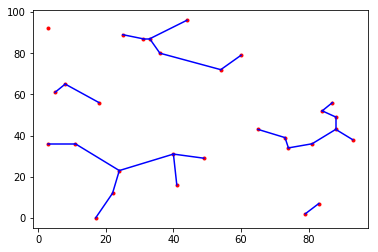

There are 6 Clusters:
1 : {'vertices': [0, 4, 5, 7, 8, 13, 14, 16], 'edges': {(15.0333, 13, 14), (8.0, 0, 4), (13.0, 5, 7), (11.1803, 7, 8), (18.3848, 4, 8), (17.8885, 8, 13), (9.2195, 13, 16)}}
2 : {'vertices': [1], 'edges': set()}
3 : {'vertices': [2, 3, 6], 'edges': {(5.0, 2, 3), (13.4536, 3, 6)}}
4 : {'vertices': [9, 10, 11, 12, 15, 17, 18], 'edges': {(9.2195, 17, 18), (6.3246, 9, 10), (19.6977, 12, 17), (7.6158, 11, 12), (14.2127, 11, 15), (2.0, 10, 11)}}
5 : {'vertices': [19, 20, 21, 23, 25, 26, 27, 28, 29], 'edges': {(5.0, 25, 26), (5.099, 20, 21), (6.0, 27, 28), (9.8995, 23, 27), (7.0711, 27, 29), (7.2801, 21, 23), (5.0, 25, 28), (8.9443, 19, 20)}}
6 : {'vertices': [22, 24], 'edges': {(6.4031, 22, 24)}}


In [79]:
# Q5. Implementation such that it stops when k clusters have been achieved and return those clusters.
#     k is a user-definable parameter.

import matplotlib.pyplot as plt
from collections import defaultdict


def k_kruskal(graph,k):
    if k <= 0 or k >= len(graph['vertices']):
        print("Wrong cluster parameter")
        k = 1
    k = len(graph['vertices']) - k
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition2.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition2.find(u) != partition2.find(v):
            partition2.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
            k -= 1
            if k == 0:
                break   
                
    # trasger forest to clusters
    vs = defaultdict(list)
    clusters = []
    for f in F['vertices']:
        vs[partition2.find(f)].append(f)
    values = list(vs.values())
    for i in range(0,len(vs)):
        clusters.append({'vertices': values[i],'edges': set([])})
    for e in F['edges']:
        for j in range(0,len(clusters)):
            if e[1] in clusters[j]['vertices']:
                clusters[j]['edges'].add(e)
                break
        
    return F, total, clusters

# k is the numebr of clusters
k = 6
tree3, total3, clusters = k_kruskal(graph,k)
print("Forest is ",tree3)
print('total weights: ', total3)


plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
for e in tree3['edges']: 
    plt.plot([pointSet.contents[e[1]].x,pointSet.contents[e[2]].x],[pointSet.contents[e[1]].y,pointSet.contents[e[2]].y],'b')
plt.show()

print("There are",k,"Clusters:")
for i in range(0,len(clusters)):
    print(i+1,":",clusters[i])

In [80]:
# Q6. Implement methods to let the user query whether two given points belong to the same cluster.

# parameter are the indexs in the pointSet, from 0 - (size-1)
# I have got all clusters in Q5
def isSameCluster(p,q,clusters):
    if p < 0 or p > len(pointSet) or q < 0 or q > len(pointSet):
        print("Wrong parameters")
        return
    for i in range(0,len(clusters)):
        if p in clusters[i]['vertices'] and q in clusters[i]['vertices']:
            return True
    return False

print(isSameCluster(5,3,clusters))
print(isSameCluster(1,3,clusters))

False
False


In [81]:
# Q7. compute the Dunn index

# I have got all clusters in Q5, and it includes max_intra distance
# and a k=1 cluster in Q4, min_inter distance must in it.

def dunn_index(forest,cs):
    max_intra = -1
    min_inter = float("inf")
    for e in forest['edges']:
        if isSameCluster(e[1],e[2],cs):
            if e[0] > max_intra:
                max_intra = e[0]
        else:
            if e[0] < min_inter:
                min_inter = e[0]
    return min_inter / max_intra

print("Dunn index is: ",dunn_index(tree2,clusters))

Dunn index is:  1.0757398071856104


In [68]:
# Q8. Compare the forest that you have generated for the k-clustering to the full minimum cost spanning tree

# k = 1 means full minimum cost spanning tree
full_tree,w,c = k_kruskal(graph,1)

# if there are 10 points, then k = 2 to 9
for k in range(2,len(pointSet)):
    t,w,cs = k_kruskal(graph,k)
    print("{} clusters Dunn index is: {}".format(k,dunn_index(full_tree,cs)))

    
# Edges in MCST but not in forest of the -clustering:
# These edges are longer than others in forest. 
# When creating MSCT, they will be created at last, and if there are k clusters exist, they will be excluded.

# Dunn index value is assoicated will the points distribution.

2 clusters Dunn index is: 1.0594420232935537
3 clusters Dunn index is: 1.0655430552487126
4 clusters Dunn index is: 1.1095544283747854
5 clusters Dunn index is: 1.0289927481749168
6 clusters Dunn index is: 1.1435394224475532
7 clusters Dunn index is: 1.11803776861298
8 clusters Dunn index is: 1.0058199011926745
9 clusters Dunn index is: 1.0479894882036462
10 clusters Dunn index is: 1.0762979588677732
11 clusters Dunn index is: 1.0049921864503857
12 clusters Dunn index is: 1.0540905160847918
13 clusters Dunn index is: 1.0
14 clusters Dunn index is: 1.0606604422449026
15 clusters Dunn index is: 1.0226205201587801
16 clusters Dunn index is: 1.0133288548817854
17 clusters Dunn index is: 1.0467076548418355
18 clusters Dunn index is: 1.0307768457710562
19 clusters Dunn index is: 1.0119317012960296
20 clusters Dunn index is: 1.012213229036522
21 clusters Dunn index is: 1.057958104652165
22 clusters Dunn index is: 1.0237595606981762
23 clusters Dunn index is: 1.1061337382721406
24 clusters Dun